In [2]:
import numpy as np
import matplotlib.pyplot as plt


In [6]:
# PARAMETERS
IDX_MIN = 3
IDX_MAX = 27

OUTPUT_PATH = 'output/01_purple/'

REA = 5
REP = 5

XMIN = 199
XMAX = 201
YMIN = 0
YMAX = 100

COLOR_A = 'C0'
COLOR_B = 'C9'
COLOR_C = 'C3'

T_STEP = 5000
SAVE_INTERVAL = 8


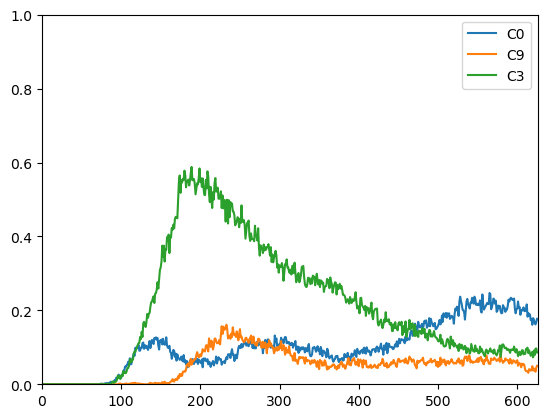

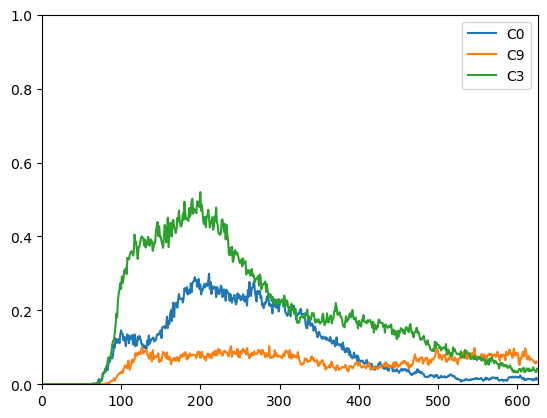

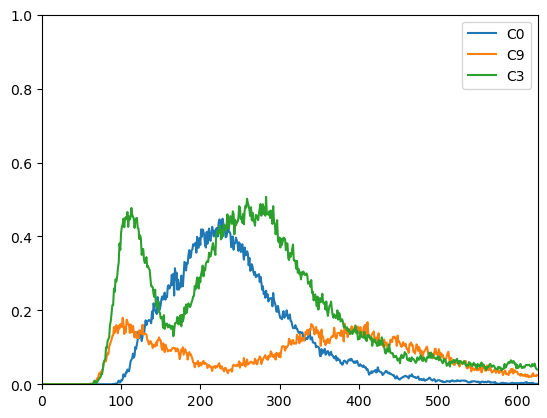

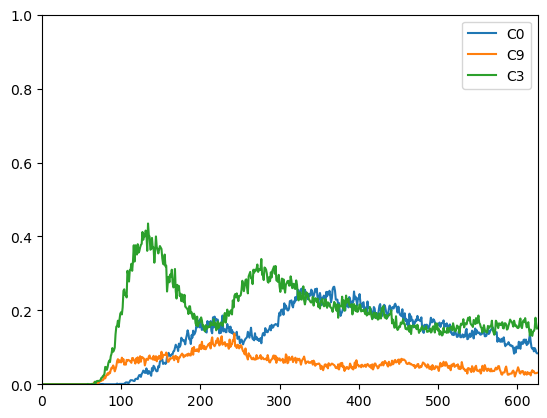

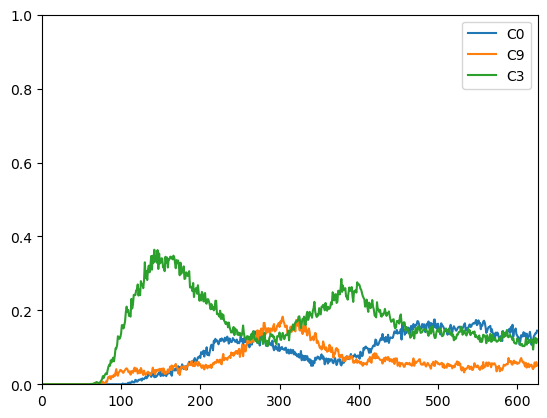

In [12]:
for idx in range(IDX_MIN, IDX_MIN+REA):
    c = np.zeros((int(T_STEP/SAVE_INTERVAL)+1, 3))
    for n in range(REP):
        # Reading particle simulation data
        pos_x_list, pos_y_list, label_list = np.load(f'{OUTPUT_PATH}index_{idx+n*REA}.npz').values()
        
        pos_x_mask = (pos_x_list > XMIN) & (pos_x_list < XMAX) 
        pos_y_mask = (pos_y_list > YMIN) & (pos_y_list < YMAX)
        mask = pos_x_mask & pos_y_mask
    
        for i in range(len(label_list)):
            c[i, 0] += np.count_nonzero(label_list[i][mask[i]] == COLOR_A)
            c[i, 1] += np.count_nonzero(label_list[i][mask[i]] == COLOR_B)
            c[i, 2] += np.count_nonzero(label_list[i][mask[i]] == COLOR_C)
        
    c = 1/((XMAX-XMIN)*(YMAX-YMIN))* c * (1/REP)

    plt.plot(c[:, 0], label=COLOR_A)
    plt.plot(c[:, 1], label=COLOR_B)
    plt.plot(c[:, 2], label=COLOR_C)
    plt.xlim(0, int(T_STEP/SAVE_INTERVAL)+1)
    plt.ylim(0, 1)
    plt.legend()
    plt.show()